In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
print(df.head())
print(df.shape)

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [4]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['seats'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.shape

(8128, 13)

In [7]:
df['mileage'] = df.mileage.str.replace(' kmpl','')
df['engine'] = df.engine.str.replace(' CC','')
df['max_power'] = df.max_power.str.replace(' bhp','')

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
 df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')

In [10]:
df['engine'] = pd.to_numeric(df['engine'],errors='coerce')
# .astype('int')

In [11]:
df['mileage'] = df.mileage.str.replace(' km/kg','')

In [12]:
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce')

In [13]:
df_copy = df.copy()

In [14]:
def impute_nan(df_f,variable):
    median = df_f[variable].median()
    df_f[variable+'_median'] = df_f[variable].fillna(median)
    random_sample=df_f[variable].dropna().sample(df_f[variable].isnull().sum(),random_state=0)
    random_sample.index=df_f[df_f[variable].isnull()].index
    df_f.loc[df_f[variable].isnull(),variable+'_random']=random_sample
    df_f.loc[~df_f[variable].isnull(),variable+'_random']=df_f[variable].dropna()

In [15]:
impute_nan(df_copy,'mileage')

In [16]:
impute_nan(df_copy,'engine')

In [17]:
impute_nan(df_copy,'max_power')

In [18]:
impute_nan(df_copy,'seats')

In [19]:
df_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,torque,seats,mileage_median,mileage_random,engine_median,engine_random,max_power_median,max_power_random,seats_median,seats_random
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,190Nm@ 2000rpm,5.0,23.40,23.40,1248.0,1248.0,74.00,74.00,5.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,250Nm@ 1500-2500rpm,5.0,21.14,21.14,1498.0,1498.0,103.52,103.52,5.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,...,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,17.70,1497.0,1497.0,78.00,78.00,5.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,22.4 kgm at 1750-2750rpm,5.0,23.00,23.00,1396.0,1396.0,90.00,90.00,5.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,16.10,1298.0,1298.0,88.20,88.20,5.0,5.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

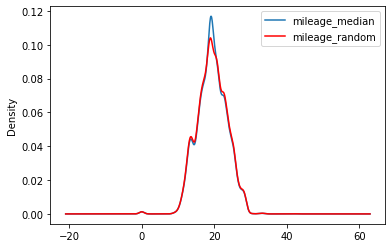

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_copy['mileage_median'].plot(kind='kde', ax=ax)
df_copy.mileage_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
#as we have the less number of the na value so we can try mean/median/mode imputation or random sample imputation
#from observation we have found that random sample imputation works well as compare to mean/median/mode imputation
#because std of the median imputation vary acc. to the original data set.
df_copy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'mileage_median', 'mileage_random', 'engine_median',
       'engine_random', 'max_power_median', 'max_power_random', 'seats_median',
       'seats_random'],
      dtype='object')

In [23]:
df_copy['current_year'] = 2020

In [24]:
df_copy['num_year'] = df_copy['current_year'] - df_copy['year']

In [25]:
df_copy.drop(df_copy.loc[df_copy['owner']== 'Test Drive Car'].index,axis=0,inplace=True)

In [26]:
df_copy.replace({'owner':{'First Owner': '1','Second Owner': '2','Third Owner': '3','Fourth & Above Owner': '4'}},inplace=True)
df_copy.replace({'transmission':{'Manual': '0','Automatic': '1'}},inplace=True)

In [27]:
df_final = df_copy[['selling_price','num_year' ,'km_driven', 'fuel', 'seller_type',
       'transmission','owner','mileage_random','engine_random','max_power_random','seats_random']]

In [28]:
df_final.head()

,selling_price,num_year,km_driven,fuel,seller_type,transmission,owner,mileage_random,engine_random,max_power_random,seats_random
0,450000,6,145500,Diesel,Individual,0,1,23.40,1248.0,74.00,5.0
1,370000,6,120000,Diesel,Individual,0,2,21.14,1498.0,103.52,5.0
2,158000,14,140000,Petrol,Individual,0,3,17.70,1497.0,78.00,5.0
3,225000,10,127000,Diesel,Individual,0,1,23.00,1396.0,90.00,5.0
4,130000,13,120000,Petrol,Individual,0,1,16.10,1298.0,88.20,5.0


In [29]:
df_final['owner']=df_final.owner.astype('int')
df_final['engine_random']=df_final.engine_random.astype('int')
df_final['seats_random']=df_final.seats_random.astype('int')
df_final['transmission']=df_final.transmission.astype('int')
df_final['num_year']=df_final.num_year.astype('int')

C:\Users\Mohd Arqam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mohd Arqam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mohd Arqam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

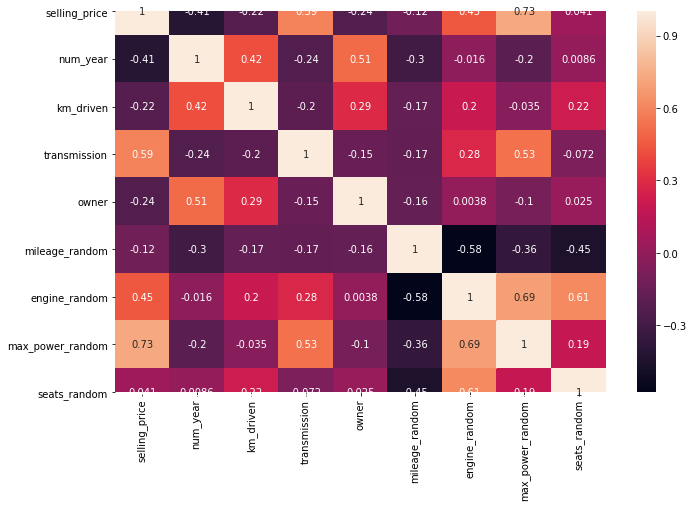

In [30]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.heatmap(df_final.corr(),annot=True)

In [31]:
df_final_n = pd.get_dummies(df_final,drop_first=True)

In [32]:
df_final_n.head()

,selling_price,num_year,km_driven,transmission,owner,mileage_random,engine_random,max_power_random,seats_random,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,6,145500,0,1,23.40,1248,74.00,5,1,0,0,1,0
1,370000,6,120000,0,2,21.14,1498,103.52,5,1,0,0,1,0
2,158000,14,140000,0,3,17.70,1497,78.00,5,0,0,1,1,0
3,225000,10,127000,0,1,23.00,1396,90.00,5,1,0,0,1,0
4,130000,13,120000,0,1,16.10,1298,88.20,5,0,0,1,1,0


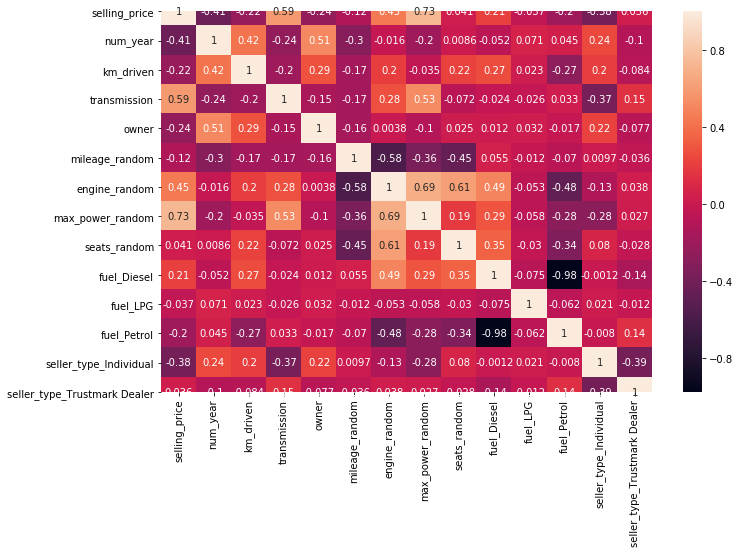

In [33]:
plt.figure(figsize=(11,7))
sns.heatmap(df_final_n.corr(),annot=True)

In [34]:
X = df_final_n.iloc[:,1:]
y = df_final_n.iloc[:,0]

In [35]:
X.head()

,num_year,km_driven,transmission,owner,mileage_random,engine_random,max_power_random,seats_random,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,6,145500,0,1,23.40,1248,74.00,5,1,0,0,1,0
1,6,120000,0,2,21.14,1498,103.52,5,1,0,0,1,0
2,14,140000,0,3,17.70,1497,78.00,5,0,0,1,1,0
3,10,127000,0,1,23.00,1396,90.00,5,1,0,0,1,0
4,13,120000,0,1,16.10,1298,88.20,5,0,0,1,1,0


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [37]:
model.fit(X,y)

ExtraTreesRegressor()

In [38]:
model.feature_importances_

array([1.55839569e-01, 4.39518224e-02, 3.03109513e-01, 1.30714871e-02,
       2.55901529e-02, 7.73742091e-02, 2.83574561e-01, 1.18077331e-02,
       3.05034538e-02, 6.82146871e-06, 2.66469388e-02, 2.73850943e-02,
       1.13864469e-03])

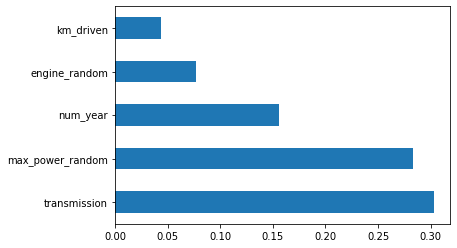

In [39]:
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
y_pred = rf_random.predict(X_test)

In [53]:
rf_random.score(X_test,y_test)

0.9374205265880189

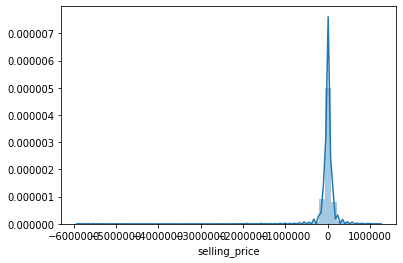

In [44]:
sns.distplot(y_pred-y_test)

In [45]:
#AUTOMATE hyperparameter tuning

In [47]:
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10,14]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4,6,8]
# # Create the random grid
# param = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#               'criterion':['mse', 'mae']}
# print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [48]:
# from tpot import TPOTRegressor


# tpot_classifier = TPOTRegressor(generations= 5, population_size= 24, offspring_size= 12,
#                                  verbosity= 2, early_stop= 12,
#                                  config_dict={'sklearn.ensemble.RandomForestRegressor': param}, 
#                                  cv = 4, scoring = 'accuracy')
# tpot_classifier.fit(X_train,y_train)

In [49]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestRegressor(
            n_estimators=n_estimators, max_depth=max_depth)

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

In [61]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-12-02 22:53:19,532] A new study created in memory with name: no-name-f13590d4-9cd6-4515-ba5a-8a0a0427bfef
[I 2020-12-02 22:53:49,835] Trial 0 finished with value: 0.9612687771587728 and parameters: {'classifier': 'RandomForest', 'n_estimators': 760, 'max_depth': 25.309640642197326}. Best is trial 0 with value: 0.9612687771587728.
[I 2020-12-02 22:54:30,865] Trial 1 finished with value: 0.9615223664332629 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1170, 'max_depth': 21.359753612894714}. Best is trial 1 with value: 0.9615223664332629.
[I 2020-12-02 22:54:59,172] Trial 2 finished with value: 0.9612695564786469 and parameters: {'classifier': 'RandomForest', 'n_estimators': 940, 'max_depth': 17.459957169992762}. Best is trial 1 with value: 0.9615223664332629.
[I 2020-12-02 22:55:46,816] Trial 3 finished with value: 0.9612700902824223 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1650, 'max_depth': 15.00114543082345}. Best is trial 1 with value: 0

[I 2020-12-02 23:15:29,938] Trial 34 finished with value: 0.9613192371801508 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1020, 'max_depth': 23.11554236086132}. Best is trial 7 with value: 0.9617704144119418.
[I 2020-12-02 23:15:56,369] Trial 35 finished with value: 0.9616475498629189 and parameters: {'classifier': 'RandomForest', 'n_estimators': 850, 'max_depth': 17.589396932359477}. Best is trial 7 with value: 0.9617704144119418.
[I 2020-12-02 23:16:20,679] Trial 36 finished with value: 0.9614595157612573 and parameters: {'classifier': 'RandomForest', 'n_estimators': 880, 'max_depth': 15.074133480443546}. Best is trial 7 with value: 0.9617704144119418.
[I 2020-12-02 23:16:37,993] Trial 37 finished with value: 0.9612544992790805 and parameters: {'classifier': 'RandomForest', 'n_estimators': 570, 'max_depth': 17.40295583007934}. Best is trial 7 with value: 0.9617704144119418.
[I 2020-12-02 23:17:02,194] Trial 38 finished with value: 0.9611895548405126 and parameters: 

Accuracy: 0.9617704144119418
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 1280, 'max_depth': 62.487530173153374}


In [46]:
rf=RandomForestRegressor(n_estimators=1280,max_depth=62.487530173153374)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=62.487530173153374, n_estimators=1280)

In [47]:
y_pred_rf = rf.predict(X_test)

In [48]:
rf.score(X_test,y_test)

0.9393854676064641

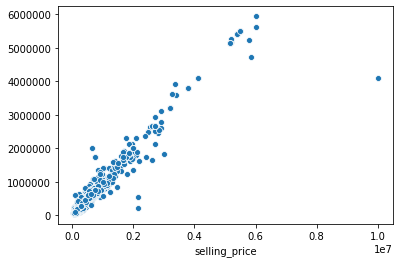

In [54]:
sns.scatterplot(y_test,y_pred_rf)

In [58]:
# import pickle
# # open a file, where you ant to store the data
# file = open('random_forest_regression_model.pkl', 'wb')

In [59]:
# pickle.dump(rf_random, file)

In [61]:
# pickle.dump(rf, open('model.pkl','wb'))

In [55]:
rf.predict([[6,145500,0,1,23.40,1248,74.00,5,1,0,0,1,0]])

array([471702.23463542])

In [68]:
import joblib
joblib.dump(rf_random,  'model.pkl',compress=2)

['model.pkl']